In [10]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv
from dollarpy import Recognizer, Template, Point
# import csv
import os

import numpy as np
import matplotlib.pyplot as plt
import socket

mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

In [11]:
# #if res=="true":
# soc = socket.socket()
# hostname="localhost"# 127.0.0.1 #0.0.0.0
# port=5000
# soc.bind((hostname,port))
# soc.listen(5)
# conn , addr = soc.accept()
# print("device connected")

In [12]:
templates=[] #list of templates for $1 training


In [13]:
sendRight=''
sendLeft=''

In [14]:
def getPoints(videoURL,label):
    cap = cv2.VideoCapture(videoURL)#web cam =0 , else enter filename
    # Initiate holistic model
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        #List to hold Coordinates
        points = []
        left_shoulder=[]
        right_shoulder=[]
        left_elbos=[]
        right_elbos=[]
        left_wirst=[]
        right_wrist=[]
        left_pinky=[]
        right_pinky=[]
        left_index=[]
        right_index=[]
        left_hip=[]
        right_hip=[]
        
        #List to Plot
        m_left_shoulder=[]
        m_right_shoulder=[]
        m_left_elbos=[]
        m_right_elbos=[]
        m_left_wirst=[]
        m_right_wrist=[]
        m_left_pinky=[]
        m_right_pinky=[]
        m_left_index=[]
        m_right_index=[]
        m_left_hip=[]
        m_right_hip=[]
    
        while cap.isOpened():
            ret, frame = cap.read()

            # Recolor Feed
            if ret==True:

                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False        

                # Make Detections
                results = holistic.process(image)
                # print(results.face_landmarks)

                # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

                # Recolor image back to BGR for rendering
                image.flags.writeable = True   
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)


                # 2. Right hand
                mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                         mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                         )

                # 3. Left Hand
                mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                         mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                         )

                # 4. Pose Detections
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                         mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                         )
                # Export coordinates
                try:
                    # Extract Pose landmarks
                    pose = results.pose_landmarks.landmark
                    index = 0
                    newlist=[]
                    for lnd in pose:
                        if(index  in [11,12,13,14,15,16,17,18,19,20]):
                            newlist.append(lnd)
                        index+=1



                    # add points of wrist , elbow and shoulder
                    left_shoulder.append(Point(newlist[0].x,newlist[0].y,1))
                    right_shoulder.append(Point(newlist[1].x,newlist[1].y,2))
                    left_elbos.append(Point(newlist[2].x,newlist[2].y,3))
                    right_elbos.append(Point(newlist[3].x,newlist[3].y,4))
                    left_wirst.append(Point(newlist[4].x,newlist[4].y,5))
                    right_wrist.append(Point(newlist[5].x,newlist[5].y,6))
                    left_pinky.append(Point(newlist[6].x,newlist[6].y,7))
                    right_pinky.append(Point(newlist[7].x,newlist[7].y,8))
                    left_index.append(Point(newlist[8].x,newlist[8].y,9))
                    right_index.append(Point(newlist[9].x,newlist[9].y,10))
                   
                    m_left_shoulder.append((newlist[0].x,newlist[0].y))
                    m_right_shoulder.append((newlist[1].x,newlist[1].y))
                    m_left_elbos.append((newlist[2].x,newlist[2].y))
                    m_right_elbos.append((newlist[3].x,newlist[3].y))
                    m_left_wirst.append((newlist[4].x,newlist[4].y))
                    m_right_wrist.append((newlist[5].x,newlist[5].y))
                    m_left_pinky.append((newlist[6].x,newlist[6].y))
                    m_right_pinky.append((newlist[7].x,newlist[7].y))
                    m_left_index.append((newlist[8].x,newlist[8].y))
                    m_right_index.append((newlist[9].x,newlist[9].y))
                   
                    #Pose Landmarks
                    #pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in newlist]).flatten())

                    # Extract Face landmarks
                    #face = results.face_landmarks.landmark

                    # Concate rows
                    #row = pose_row
                    points = left_shoulder+right_shoulder+left_elbos+right_elbos+left_wirst+right_wrist+left_pinky+right_pinky+left_index+right_index

                    recognizer = Recognizer(templates)
                    result = recognizer.recognize(points)
                    send=str(result[0])+","
                    msg=bytes(send,'utf-8')
                    #conn.send(msg)




                except:
                    pass

                cv2.imshow(label, image)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()
    print(label)
    xs, ys = zip(*m_left_shoulder)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_shoulder)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_left_elbos)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')

    xs, ys = zip(*m_right_elbos)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_left_wirst)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_wrist)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')


    xs, ys = zip(*m_left_pinky)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_pinky)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_left_index)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')


    xs, ys = zip(*m_right_index)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
   


    plt.gca().invert_yaxis()


    plt.show()

    return result,points

In [15]:
# #if res=="true":
# soc = socket.socket()
# hostname="localhost"# 127.0.0.1 #0.0.0.0
# port=5001
# soc.bind((hostname,port))
# soc.listen(5)
# conn , addr = soc.accept()
# print("device connected")


Explaining


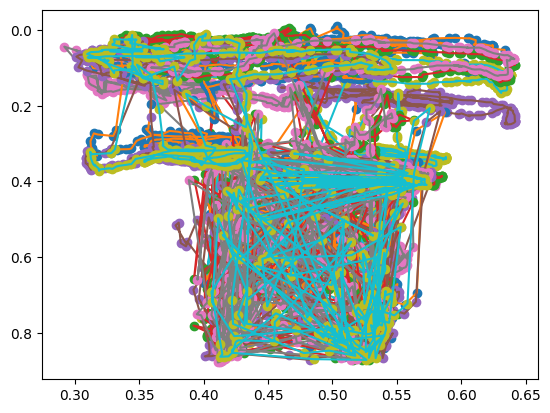

Sitting


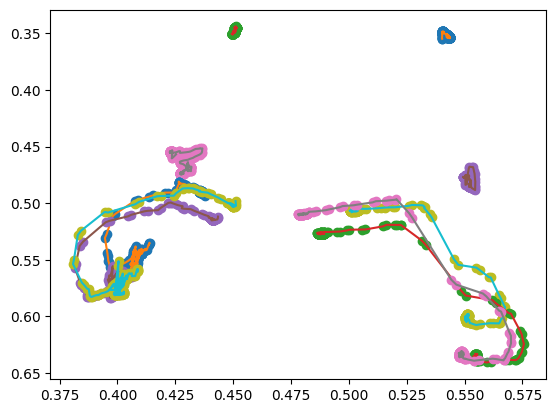

In [16]:
#hook correct
#if res=="true":
vid = "Explaining.mp4"
result,points = getPoints(vid,"Explaining") 
tmpl_2 = Template('Explaining', points)
templates.append(tmpl_2)

    #UPPER
    #uppercut correct
vid = "Sitting.mp4"
result,points = getPoints(vid,"Sitting") 
tmpl_2 = Template('Sitting', points)
templates.append(tmpl_2)



Test


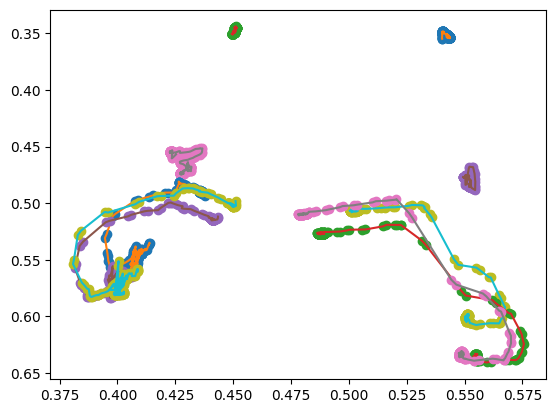

Sitting
0.0


In [17]:
#TEST
#if res=="true":
vid = "Sitting.mp4"
result,points = getPoints(vid,"Test") 

import time 
start = time.time()

#print (points)
end = time.time()
duration=end-start
print(result[0])
# print(duration)
#print (recognizer)
